# Greataxe vs Greatsword??

### Background
There is constant debate whether Greataxe (1d12) or Greatsword (2d6) is better for Barbarians.

* Min damage is 2 for GS instead of 1 for GA
* Consistent damage with GS (bell curve) instead of all equal chance with GA
* Average damage of 2d6 is 7, while average damage of 1d12 is 6.5.

However, Barbarian (and half-orc) have the ability to add an extra weapon die on a critical. This means on a crit, greatsword adds 1d6 but greataxe adds 1d12.

### So which is better?

In [43]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [55]:
numtrials = 50000

In [56]:
dmg_df = pd.DataFrame()
for brutal in range(0,4):
    greatsword = []
    greataxe = []
    for target_ac in range(15,26):
        greatsword_ac = []
        greataxe_ac = []
        for trials in range(numtrials):
            # Assuming Reckless, so constant advantage
            roll = max(random.randint(1,20),random.randint(1,20))
            if roll == 20:# or roll == 19:
                greatsword_ac.append(random.randint(1,6)+random.randint(1,6)+random.randint(1,6)+random.randint(1,6))
                greataxe_ac.append(random.randint(1,12)+random.randint(1,12))
                for _ in range(brutal):
                    greatsword_ac.append(random.randint(1,6))
                    greataxe_ac.append(random.randint(1,12))
            elif roll+4+5 >= target_ac:
                greatsword_ac.append(random.randint(1,6)+random.randint(1,6))
                greataxe_ac.append(random.randint(1,12))
        greatsword.append(np.sum(greatsword_ac)/numtrials)
        greataxe.append(np.sum(greataxe_ac)/numtrials)
    dmg_df['greatsword'+str(brutal)] = greatsword
    dmg_df['greataxe'+str(brutal)] = greataxe

In [57]:
dmg_df

,greatsword0,greataxe0,greatsword1,greataxe1,greatsword2,greataxe2,greatsword3,greataxe3
0,7.27134,6.73650,7.60364,7.37730,7.93430,8.00918,8.28118,8.61282
1,7.09462,6.56352,7.35928,7.13932,7.74010,7.80722,8.04490,8.40434
2,6.82090,6.31834,7.16050,6.99136,7.47714,7.55378,7.83176,8.20388
3,6.54290,6.06458,6.93816,6.74076,7.24268,7.33570,7.59404,7.97538
4,6.24774,5.82568,6.63078,6.49064,6.97004,7.09020,7.29202,7.72722
5,5.90652,5.49262,6.23060,6.13184,6.65192,6.82486,6.94402,7.41920
6,5.57160,5.14732,5.90860,5.79124,6.26374,6.46682,6.59028,7.05156
7,5.21382,4.83518,5.49114,5.40756,5.85192,6.05312,6.12768,6.62440
8,4.69402,4.38640,5.07844,5.02998,5.38740,5.62306,5.75824,6.27252
9,4.26020,3.96070,4.61676,4.59488,4.92272,5.22328,5.33250,5.92964


In [58]:
dmg_df.index = range(15,26)

In [59]:
dmg_df

,greatsword0,greataxe0,greatsword1,greataxe1,greatsword2,greataxe2,greatsword3,greataxe3
15,7.27134,6.73650,7.60364,7.37730,7.93430,8.00918,8.28118,8.61282
16,7.09462,6.56352,7.35928,7.13932,7.74010,7.80722,8.04490,8.40434
17,6.82090,6.31834,7.16050,6.99136,7.47714,7.55378,7.83176,8.20388
18,6.54290,6.06458,6.93816,6.74076,7.24268,7.33570,7.59404,7.97538
19,6.24774,5.82568,6.63078,6.49064,6.97004,7.09020,7.29202,7.72722
20,5.90652,5.49262,6.23060,6.13184,6.65192,6.82486,6.94402,7.41920
21,5.57160,5.14732,5.90860,5.79124,6.26374,6.46682,6.59028,7.05156
22,5.21382,4.83518,5.49114,5.40756,5.85192,6.05312,6.12768,6.62440
23,4.69402,4.38640,5.07844,5.02998,5.38740,5.62306,5.75824,6.27252
24,4.26020,3.96070,4.61676,4.59488,4.92272,5.22328,5.33250,5.92964


The damage listed here is only the weapon damage, no rage, modifiers, or anythign else.

<function matplotlib.pyplot.show(*args, **kw)>

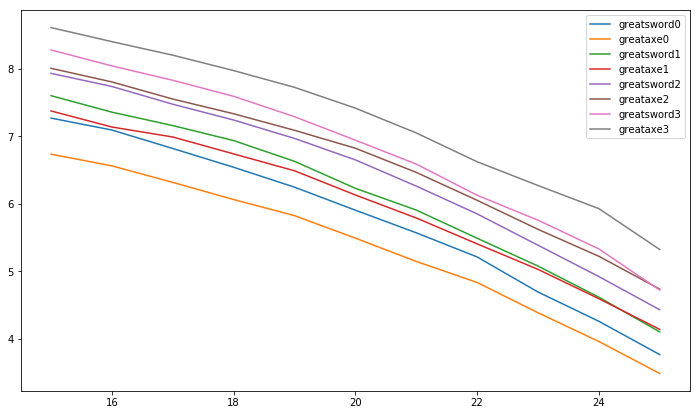

In [60]:
plt.figure(figsize=(12,7))
plt.plot(dmg_df.index,dmg_df)
plt.legend(dmg_df.columns,loc="best")
plt.savefig("brutalcritical20.png")
plt.show

# Conclusion

* At no extra dice (Orange, Blue), GS>GA
* At 1 extra die (Red, Green), GS>GA but by less, and at very high ACs, they approach each other (as a higher % of hits are crits)
* At 2 extra dice (Brown, Purple), GA>GS, close at low ACs, but a larger gap opens at higher ACs.
* At 3 extra dice (Gray, Pink), GA>>GS, never a question about it.

Note: A 17+ level Half-Orc Barbarian will actually have 4 extra dice (3 from Barbarian Brutal Critical and 1 from Half-Orc Savage Attacks), and assumedly the gap will widen.

# tl;dr:

At low levels, use Greatsword. Once you have two extra dice, switch to Greataxe. This assumes you are always reckless attacking.